In [1]:
pip install pyspark

Условие: дана таблица с колонками (id, name, salary, managerId), студентам необходимо написать код на spark, который создаст эту таблицу (данные указаны ниже) и в результате выдаст таблицу в которой будут имена сотрудников, которые зарабатывают больше своих менеджеров.
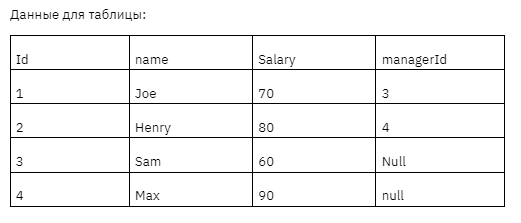

In [4]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [16]:
from pyspark.sql.functions import sum, avg, when, max
from pyspark.sql import functions as F

In [86]:
spark = SparkSession.builder.master('local[*]').appName('transf_test').getOrCreate()

In [66]:
employees = spark.createDataFrame([ [1, 'Joe', 70, 3],
    [2, 'Henry', 80, 4],
    [3, 'Sam', 60, None],
    [4, 'Max',  90, None]], ['id','name', 'salary', 'managerid'])

In [15]:
employees.show()

+---+-----+------+---------+
| id| name|salary|managerid|
+---+-----+------+---------+
|  1|  Joe|    70|        3|
|  2|Henry|    80|        4|
|  3|  Sam|    60|     NULL|
|  4|  Max|    90|     NULL|
+---+-----+------+---------+



In [21]:
employees.select(['id', 'name', 'salary']).orderBy(employees.salary.desc()).show(1)

+---+----+------+
| id|name|salary|
+---+----+------+
|  4| Max|    90|
+---+----+------+
only showing top 1 row



In [31]:
employees.select(['name']).orderBy(employees.salary.desc()).show(1)

+----+
|name|
+----+
| Max|
+----+
only showing top 1 row



In [87]:
#если больше одной максимальной зарплаты?
persons = spark.createDataFrame([
    [1, 'Joe', 70, 3],
    [2, 'Henry', 80, 4],
    [3, 'Sam', 60, None],
    [4, 'Max',  90, None],
    [5, 'John', 75, 4],
    [6, 'Patrick', 90, 4]])\
.toDF('id','name', 'salary', 'managerid')

In [89]:
df = persons.agg(max(persons.salary).alias('max_salary'))
persons_max_salary = persons.filter(persons.salary == df.collect()[0]['max_salary'])
persons_max_salary.select(['name']).show()

+-------+
|   name|
+-------+
|    Max|
|Patrick|
+-------+





---


увидела, что напутала с заданием и просто вывожу имя того, кто больше остальных
зарабатывает; исправляюсь

In [67]:
employees.show()

+---+-----+------+---------+
| id| name|salary|managerid|
+---+-----+------+---------+
|  1|  Joe|    70|        3|
|  2|Henry|    80|        4|
|  3|  Sam|    60|     NULL|
|  4|  Max|    90|     NULL|
+---+-----+------+---------+



In [72]:
manager_names = employees.withColumn('manager_name', when(employees.managerid == 3, 'Sam')
                     .when(employees.managerid == 4, 'Max')
                     .when(employees.managerid.isNull(), 'No manager')
                     .otherwise(employees.managerid))
manager_salaries = manager_names.withColumn('manager_salary', when(manager_names.manager_name == 'Sam', 60)
                     .when(manager_names.manager_name == 'Max', 90).otherwise(None))

In [84]:
salary_filter = manager_salaries.filter(manager_salaries.salary > manager_salaries.manager_salary)
salary_filter.select('name').show()

+----+
|name|
+----+
| Joe|
+----+



скорее всего, есть более простой способ...
😞